# PCA
Principle components analysis of food data with visualization.

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
%matplotlib inline

In [56]:
# Load in food data
out = open('data/final/food_1970_2000_cleaned.p', 'r')
food_1970_2000 = pickle.load(out)
out.close()

In [14]:
# Fit PCA with 2 components on 1970-2000 data
pca_1970_2000_2 = PCA(n_components=2)
food_1970_2000_2_r = pca_1970_2000_2.fit(food_1970_2000).transform(food_1970_2000)
print('explained variance ratio (first two components): %s'
      % str(pca_1970_2000_2.explained_variance_ratio_))

# Fit PCA with 3 components on 1970-2000 data
pca_1970_2000_3 = PCA(n_components=3)
food_1970_2000_3_r = pca_1970_2000_3.fit(food_1970_2000).transform(food_1970_2000)
print('explained variance ratio (first three components): %s'
      % str(pca_1970_2000_3.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.32801996  0.14701535]
explained variance ratio (first three components): [ 0.32801996  0.14701535  0.09909793]


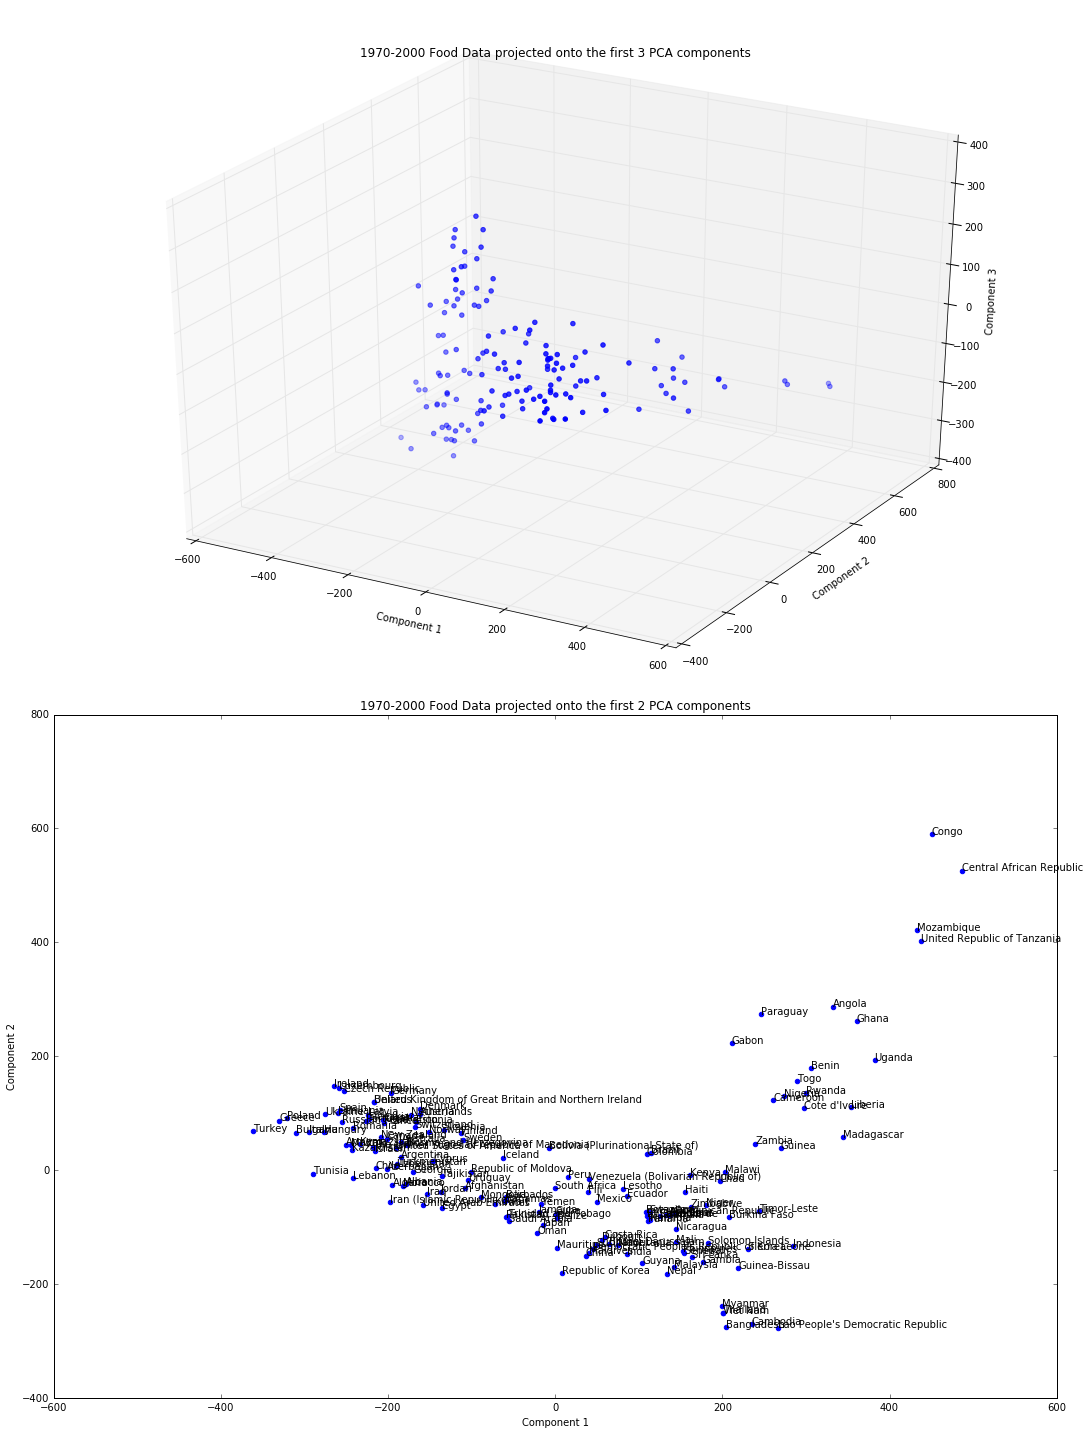

In [55]:
# Visualize our reduced data
fig = plt.figure(figsize=(15, 20))

# Visualize PCA with 2 components
ax2 = fig.add_subplot(2, 1, 2)
ax2.scatter(food_1970_2000_2_r[:, 0], food_1970_2000_2_r[:, 1], color='b')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('1970-2000 Food Data projected onto the first 2 PCA components')
ax2.legend()

# Visualize PCA with 3 components
ax1 = fig.add_subplot(2, 1, 1,  projection='3d')
ax1.scatter(food_1970_2000_3_r[:, 0], food_1970_2000_3_r[:, 1], food_1970_2000_3_r[:, 2], color='b')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('1970-2000 Food Data projected onto the first 3 PCA components')
ax1.legend()

# Annotate points with country name
for i, country in enumerate(food_1970_2000.index):
    ax2.annotate(country, (food_1970_2000_2_r[i, 0], food_1970_2000_2_r[i, 1]))

plt.tight_layout()
plt.show()

As we saw with the network graph visualization of countries using a nearest neighbors approach, we see that countries that are close to one another geographically do tend to be close together in the PCA projection of food data. However, this is not always the case.

## Export 3d projection to CSV for visualization with plotly
We'll export the coordinates for the PCA with 3 dimensions to a csv file so that we can create an interactive visualization with [plotly.js](https://plot.ly/javascript/) in our final website.

In [69]:
pca_data = pd.DataFrame(food_1970_2000_3_r, index=list(food_1970_2000.index), columns=['x', 'y', 'z'])
pca_data.to_csv("data/pca/food_by_country.csv", index_label="Country")

## Extracting diets from PCA components
Let's see if we can 